In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
import requests
warnings.filterwarnings("ignore")

In [3]:
# importing and reading the csv raw data
data_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv', index_col=False)


In [4]:
data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
data_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv', index_col=False)

In [6]:
data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
data_train.shape

(8523, 12)

### Data Exploration

In [8]:
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
# Check for the missing vales
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* From the info we came to know that "Item_Weight", "Outlet_Size" and "Item_Outlet_Sales" has missing values

In [11]:
a = data_train['Item_Weight'].mean()
a

12.857645184136183

In [12]:
data_train['Item_Weight'] = data_train['Item_Weight'].fillna(a)
data_train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [13]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
mode_of_outlet_size=data_train.pivot_table(values = 'Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x : x.mode()[0]))


In [15]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [16]:
missing_values = data_train['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [17]:
#data_train.loc[missing_values, 'Outlet_Size'] =data_train.loc[missing_values, 'Outlet_Type'].apply(lambda x : mode_of_outlet_size)

In [18]:
data_train['Outlet_Size'] = data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].dropna().mode().values[0])

In [19]:
data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [21]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
* Outlet_Establishment_Year vary from 1985 to 2009 have a better impact on sales.

#### Data Analysis

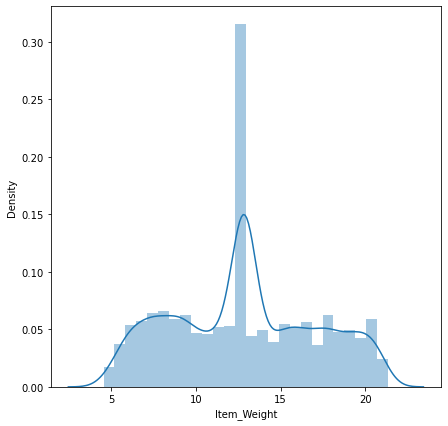

In [22]:
plt.figure(figsize=(7,7)) 
sns.distplot(data_train['Item_Weight'])
plt.show()

* From the graph the distribution is normal

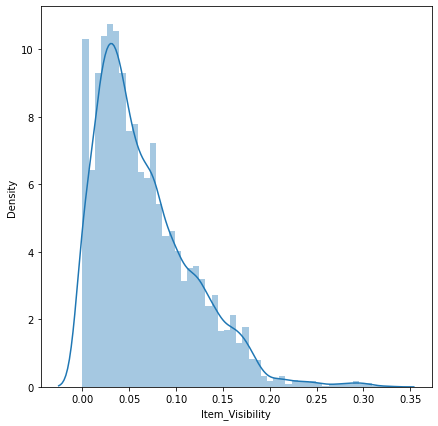

In [23]:
plt.figure(figsize=(7,7)) 
sns.distplot(data_train['Item_Visibility'])
plt.show()

* From the graph the distribution is right- skewed

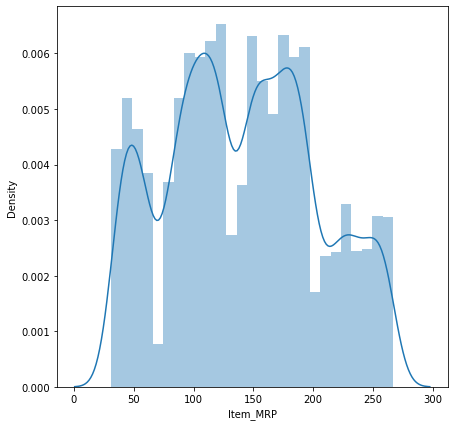

In [24]:
plt.figure(figsize=(7,7)) 
sns.distplot(data_train['Item_MRP'])
plt.show()

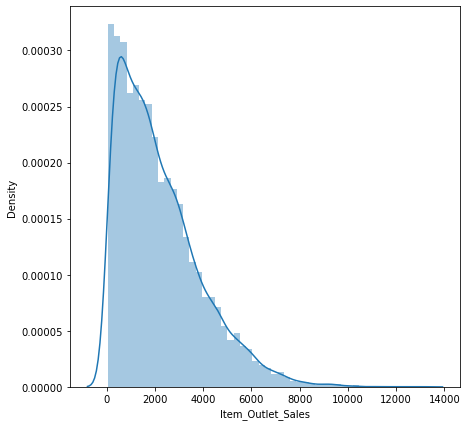

In [25]:
plt.figure(figsize=(7,7)) 
sns.distplot(data_train['Item_Outlet_Sales'])
plt.show()

* From the graph the distribution is right- skewed

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

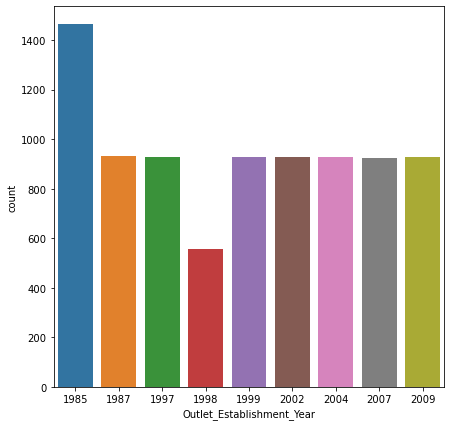

In [26]:
#countplot to check'Item_Fat_Content' column
plt.figure(figsize=(7,7)) 
sns.countplot('Outlet_Establishment_Year',data=data_train )
data_train['Outlet_Establishment_Year'].value_counts()

* From the countplot we can see that year 1985 has the highest Outlet_Sales and year 1998 has lowest Outlet_Sales
* From 1999-2009 the sales density was better

### Data Exploration

#### Categorical columns

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

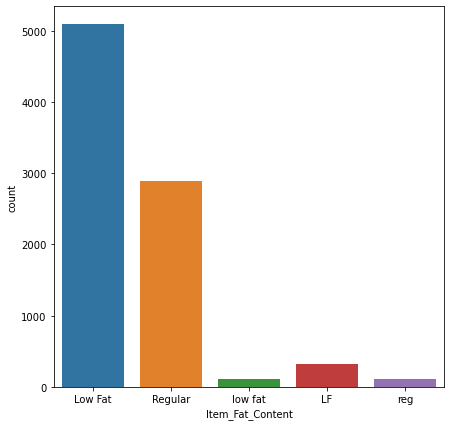

In [27]:
#countplot to check'Item_Fat_Content' column
plt.figure(figsize=(7,7)) 
sns.countplot('Item_Fat_Content',data=data_train )
data_train['Item_Fat_Content'].value_counts()

* We can say that "Low Fat" is also named as "LF" and "low fat". Similarly for "Regular" is named as "reg"

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

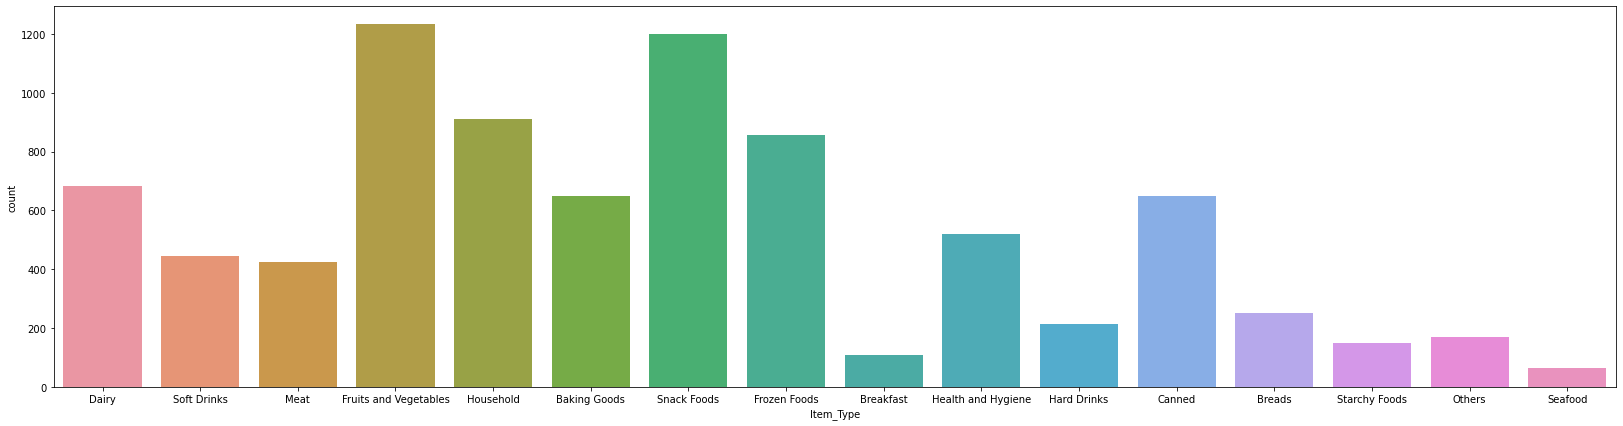

In [28]:
#countplot to check'Item_Type' column
plt.figure(figsize=(28,7)) 
sns.countplot('Item_Type',data=data_train )
data_train['Item_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

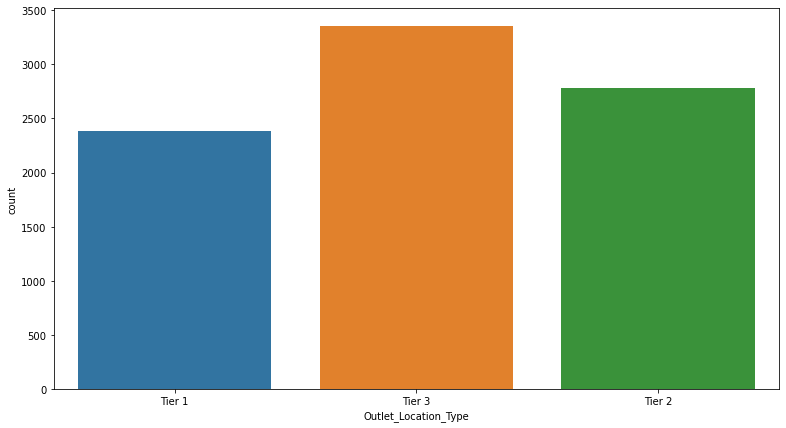

In [29]:
#countplot to check'Outlet_Location_Type' column
plt.figure(figsize=(13,7)) 
sns.countplot('Outlet_Location_Type',data=data_train )
data_train['Outlet_Location_Type'].value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

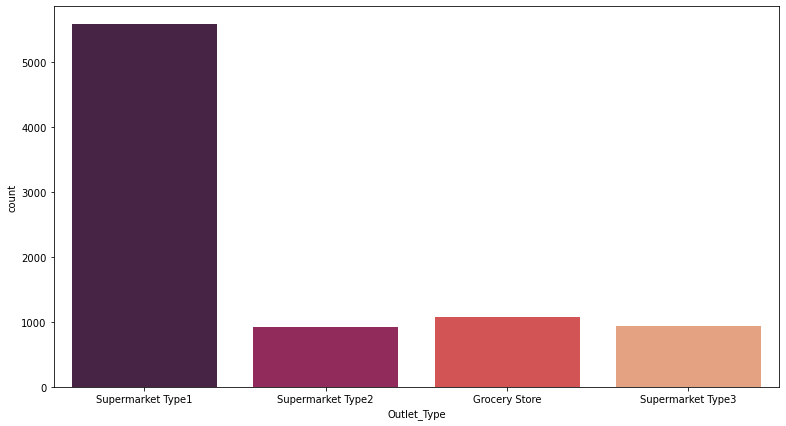

In [30]:
#countplot to check'Outlet_Type' column
plt.figure(figsize=(13,7)) 
sns.countplot('Outlet_Type',data=data_train,palette='rocket' )
data_train['Outlet_Type'].value_counts()

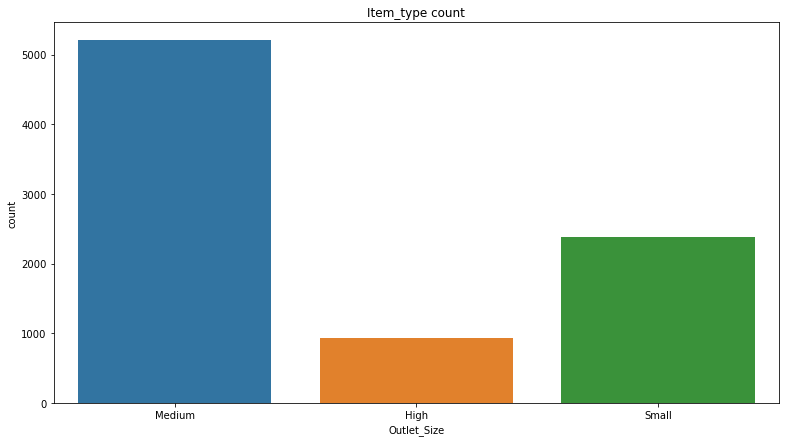

In [31]:
#countplot to check'Outlet_Size' column
plt.figure(figsize=(13,7)) 
sns.countplot(x='Outlet_Size',data=data_train )
plt.title('Item_type count')
plt.show()

#### Data Pre-Processing

In [32]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
data_train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [34]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Data Visualization 


Univariate Plots
* Create countplots for the categorical columns:

In [35]:
#categorical columns
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

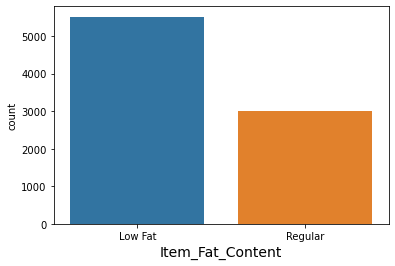

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=data_train )
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

Multivariate plots
* Check the following relationships with Item_Outlet_Sales



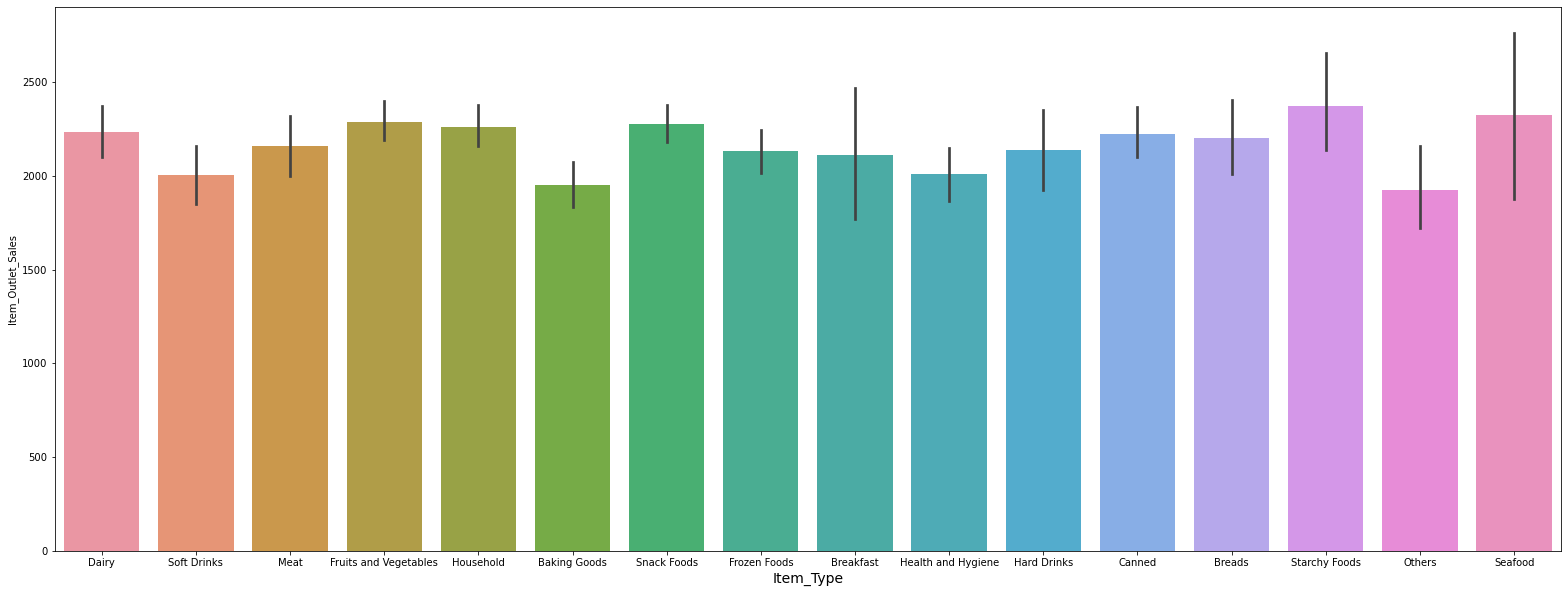

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [37]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=data_train )
plt.xlabel('Item_Type', fontsize=14)
plt.show()
print(data_train['Item_Type'].value_counts())

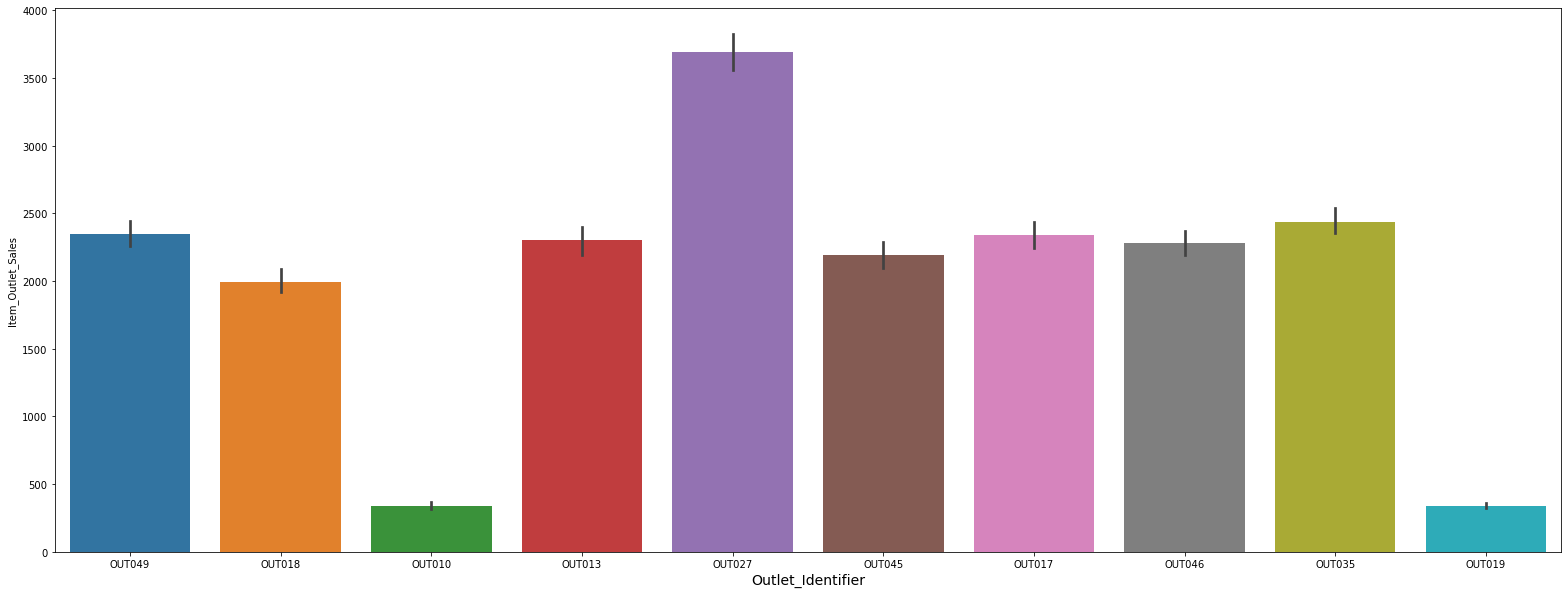

In [38]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=data_train)
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

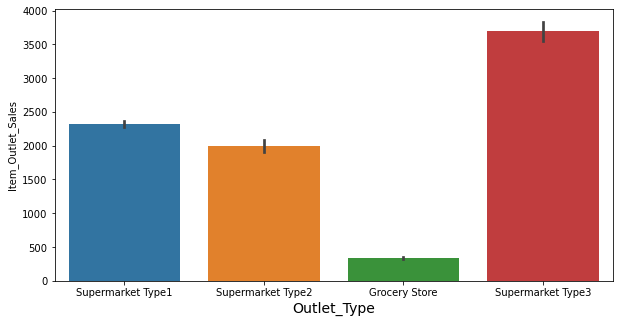

In [39]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=data_train)
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

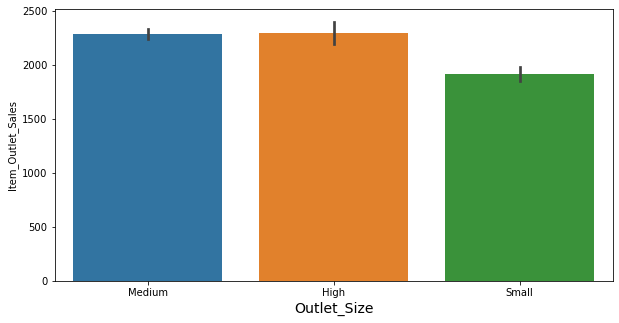

In [40]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=data_train)
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

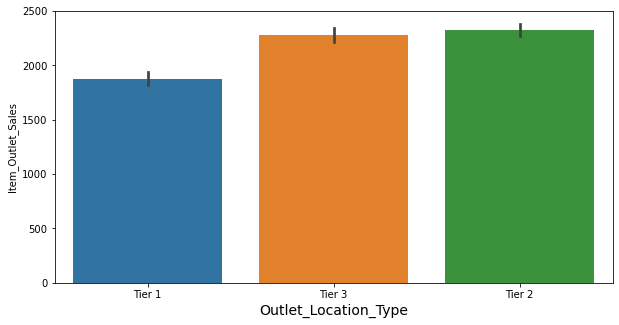

In [41]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=data_train)
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

The difference in item types by sales is very small.
Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.
Suprisingly supermarket type 3 is the most profitable and not type 1.
Medium and high outlet sizes are pretty much even in sales.
Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

#### Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [43]:
data_train['Item_Identifier']=encode.fit_transform(data_train['Item_Identifier'])

data_train['Item_Fat_Content']=encode.fit_transform(data_train['Item_Fat_Content'])

data_train['Item_Type']=encode.fit_transform(data_train['Item_Type'])

data_train['Outlet_Identifier']=encode.fit_transform(data_train['Outlet_Identifier'])

data_train['Outlet_Size']=encode.fit_transform(data_train['Outlet_Size'])

data_train['Outlet_Location_Type']=encode.fit_transform(data_train['Outlet_Location_Type'])

data_train['Outlet_Type']=encode.fit_transform(data_train['Outlet_Type'])


In [44]:
data_train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,1,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,1,1,1,4710.5350


#### Spliting features and Targets

In [45]:
A=data_train.drop(columns='Item_Outlet_Sales',axis=1)
B=data_train['Item_Outlet_Sales']

In [46]:
print(A)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [47]:
print(B)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


#### Spliting the data into Training and Testing data 

In [48]:
A_train, A_test, B_train, B_test = train_test_split(A, B,random_state=2,test_size=0.2)

In [49]:
print(A_train.shape, A_test.shape, A.shape)

(6818, 11) (1705, 11) (8523, 11)


#### Model Training


#### XGBoost Regressor

In [80]:
xgr= XGBRegressor()

In [81]:
xgr.fit(A_train,B_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [82]:
# Predtion on training data
train_prediction = xgr.predict(A_train)

In [83]:
# R square value
r2_train=metrics.r2_score(B_train, train_prediction)

In [84]:
print('R squared value=',r2_train )

R squared value= 0.8549833167058186


In [85]:
# Predtion on testing data
test_prediction = xgr.predict(A_test)

In [86]:
# R square value
r2_test=metrics.r2_score(B_test, test_prediction)

In [87]:
print('R squared value=',r2_test )

R squared value= 0.5191234777241828


#### Random forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rfr = RandomForestRegressor()

In [90]:
rfr.fit(A_train, B_train)

RandomForestRegressor()

In [91]:
# Predtion on training data
train_prediction_1 = rfr.predict(A_train)

In [92]:
# R square value
r2_train_1=metrics.r2_score(B_train, train_prediction_1)

In [93]:
print('R squared value=',r2_train_1 )

R squared value= 0.9384069153410894


In [94]:
# Predtion on testing data
test_prediction_1 = rfr.predict(A_test)

In [95]:
# R square value
r2_test_1=metrics.r2_score(B_test, test_prediction_1)

##### Decision Tree Regressor

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
dtr= DecisionTreeRegressor()

In [98]:
dtr.fit(A_train,B_train)

DecisionTreeRegressor()

In [99]:
# Predtion on training data
train_prediction_2 = dtr.predict(A_train)

In [100]:
# R square value
r2_train_2=metrics.r2_score(B_train, train_prediction_2)

In [101]:
print('R squared value=',r2_train_2 )

R squared value= 1.0


In [102]:
# Predtion on testing data
test_prediction_2 = dtr.predict(A_test)

In [103]:
# R square value
r2_test_2=metrics.r2_score(B_test, test_prediction_2)

In [104]:
print('R squared value=',r2_test_1 )

R squared value= 0.5557296304409372


### Dataframe created for the best model(XGBoost Regressor) 

In [105]:
# To create Dataframe of predicted value with particular respective index
result1 = pd.DataFrame()  #target data
result1['Prediction of Trained data']=train_prediction
result1

,Prediction of Trained data
0,2172.693115
1,2844.067139
2,3308.635254
3,1334.290039
4,114.541870
...,...
6813,2551.723389
6814,2598.309814
6815,3363.312744
6816,1717.406616


In [106]:
# To create Dataframe of predicted value with particular respective index
result2 = pd.DataFrame()  #target data
result2['Prediction of Test data']=test_prediction
result2

,Prediction of Test data
0,2098.796875
1,4360.375977
2,1454.360840
3,229.103775
4,282.391571
...,...
1700,3519.781250
1701,889.154175
1702,2883.560791
1703,1158.335083


In [107]:
data_row = pd.concat([result1, result2], ignore_index=True)
data_row

,Prediction of Trained data,Prediction of Test data
0,2172.693115,NaN
1,2844.067139,NaN
2,3308.635254,NaN
3,1334.290039,NaN
4,114.541870,NaN
...,...,...
8518,NaN,3519.781250
8519,NaN,889.154175
8520,NaN,2883.560791
8521,NaN,1158.335083


In [108]:
#save the dataframe into csv file
data_row.to_csv('Big_Data_Mart_case_study.csv')